C:\Users\andri\AppData\Local\Temp\ipykernel_31392\2687525678.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object
                  Store  DayOfWeek     Sales  Customers      Open     Promo  \
Store          1.000000  -0.000008  0.005126   0.024325 -0.000047  0.000058   
DayOfWeek     -0.000008

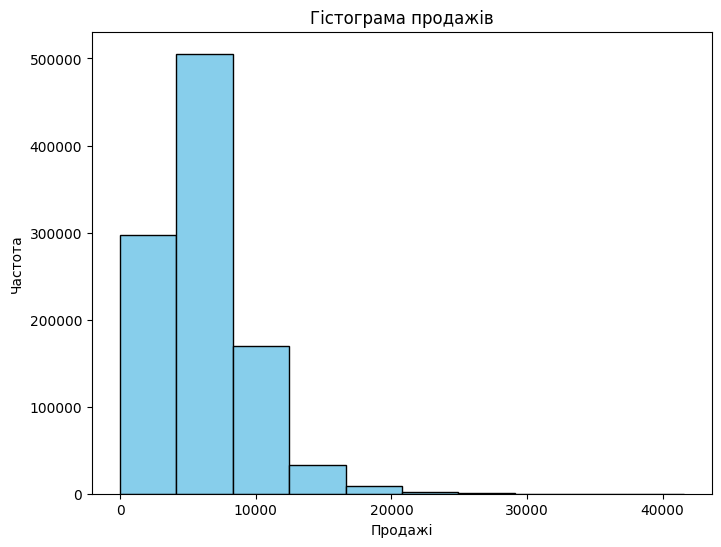

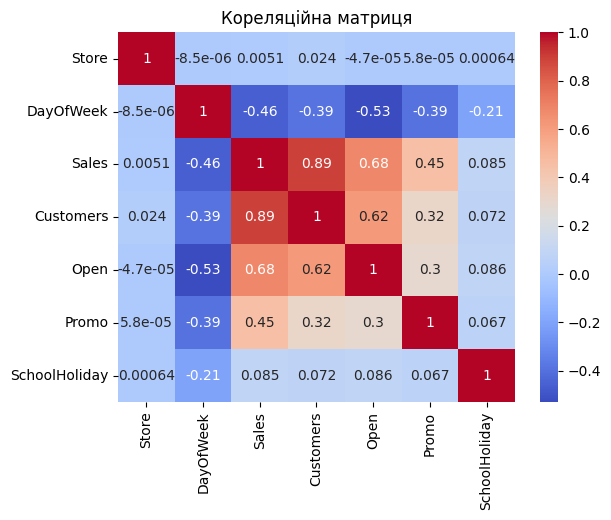

C:\Users\andri\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1017209.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test: статистика = 0.9412193474037331 , p-value = 1.5910681066096388e-137


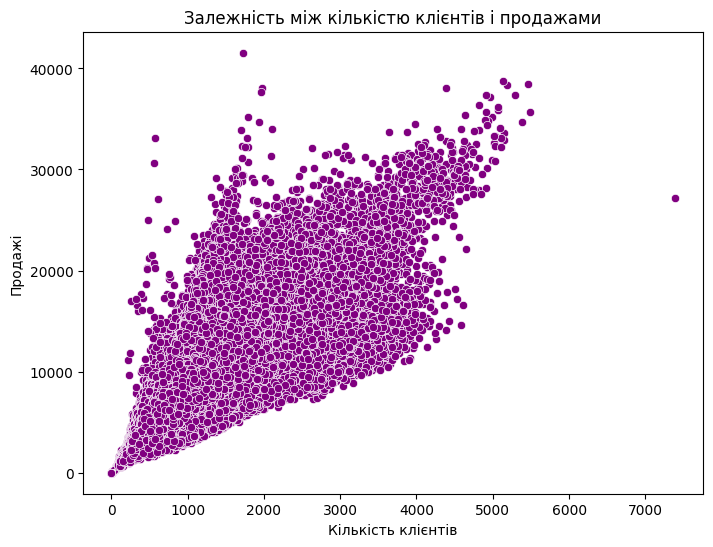

Кореляція між продажами та кількістю клієнтів: 0.8947107733016734


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('data.csv')

print(df.head())

print(df.dtypes)

df['Date'] = pd.to_datetime(df['Date'])

df_numeric = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_numeric.corr()
print(correlation_matrix)


plt.figure(figsize=(8, 6))
plt.hist(df['Sales'], bins=10, edgecolor='black', color='skyblue')
plt.title('Гістограма продажів')
plt.xlabel('Продажі')
plt.ylabel('Частота')
plt.show()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

stat, p_value = stats.shapiro(df['Sales'])
print('Shapiro-Wilk Test: статистика =', stat, ', p-value =', p_value)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Customers'], y=df['Sales'], color='purple')
plt.title('Залежність між кількістю клієнтів і продажами')
plt.xlabel('Кількість клієнтів')
plt.ylabel('Продажі')
plt.show()

sales_customers_corr = df[['Sales', 'Customers']].corr()
print(f"Кореляція між продажами та кількістю клієнтів: {sales_customers_corr.iloc[0, 1]}")
